# Machine Learning

The objective of the project is to build the best 'Linear Regression' model to predict the number of Bike demands. For this reason, you have to start by building 3 models and comparing them:

- First, by using your implementation-from-scratch of linear regression with gradient descent

- Second, by using your implementation of the closed form solution (normal equation)

- Third, by using te Scikit Learn library

Then you have to do feature engineering (dummy variables for instance) to optimize your model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
bike_rental_df = pd.read_csv('./Bike Rental UCI dataset.csv')
bike_rental_df = pd.concat([bike_rental_df, pd.get_dummies(bike_rental_df['dayOfWeek'])], axis=1)
bike_rental_df.drop(columns='dayOfWeek', inplace=True)
bike_rental_df.head(10)

# columns 
# "season","yr","mnth","hr","holiday","workingday","weathersit","temp","hum","windspeed","days", "Mon", "Tue", "Wed", "Thr", "Fri", "Sat", "Sun"

season  yr  mnth  hr  holiday  workingday  weathersit  temp   hum  \
0       1   0     1   0        0           0           1  0.24  0.81   
1       1   0     1   1        0           0           1  0.22  0.80   
2       1   0     1   2        0           0           1  0.22  0.80   
3       1   0     1   3        0           0           1  0.24  0.75   
4       1   0     1   4        0           0           1  0.24  0.75   
5       1   0     1   5        0           0           2  0.24  0.75   
6       1   0     1   6        0           0           1  0.22  0.80   
7       1   0     1   7        0           0           1  0.20  0.86   
8       1   0     1   8        0           0           1  0.24  0.75   
9       1   0     1   9        0           0           1  0.32  0.76   

   windspeed  days  demand  Fri  Mon  Sat  Sun  Thr  Tue  Wed  
0     0.0000     0      16    0    0    1    0    0    0    0  
1     0.0000     0      40    0    0    1    0    0    0    0  
2     0.0000     0      32    0    0    1    0    0    0    0  
3     0.0000     0      13    0    0    1    0    0    0    0  
4     0.0000     0       1    0    0    1    0    0    0    0  
5     0.0896     0       1    0    0    1    0    0    0    0  
6     0.0000     0       2    0    0    1    0    0    0    0  
7     0.0000     0       3    0    0    1    0    0    0    0  
8     0.0000     0       8    0    0    1    0    0    0    0  
9     0.0000     0      14    0    0    1    0    0    0    0

In [3]:
def normalisation(feature):
    return (feature - feature.mean()) / feature.std()

## 1. Implementation from scratch of Linear regression

In [32]:
class LogisticRegressionScratch():
    
    def __init__(self,X,Y):
        self.X=X
        self.Y=Y
        self.theta = np.ones((X.shape[1] , 1))
        
    def prediction(self):
        return self.X.dot(self.theta)

    def compute_cost(self):
        m = len(self.Y)
        return np.sum((self.X.dot(self.theta) - self.Y) ** 2)/(2 * m)
    
    def gradient_descent(self,alph, n_iter, delta):
        
        m = len(self.Y)
        cur_iter = 0
        cur_delta = 1000
        cost_history = []
        theta_history = []
        last_cost = self.compute_cost() + 1 

        
        while cur_iter < n_iter and cur_delta > delta:
            prediction = self.prediction()
            loss = prediction - self.Y
            
            gradient = self.X.T.dot(loss)/m
            self.theta = self.theta - alph * gradient
            theta_history.append(self.theta)
            
            cost = self.compute_cost()
            cost_history.append(cost)
            
            cur_delta = abs(last_cost - cost)
            last_cost = cost
            cur_iter +=1
            
        return self.theta, cost_history, cur_iter
    
    def RSME(self):
        MSE = np.sum((self.prediction() - self.Y)**2)
        RSME = np.sqrt(MSE/m)
        return RSME
    
    def R2(self):
        SSR = np.sum((self.prediction() - self.Y)**2)
        SST = np.sum((self.Y - np.mean(self.Y))**2)
        R2 = 1 - (SSR/SST)
        return R2

In [35]:
feature = bike_rental_df[['temp', 'hr', 'mnth','windspeed']]

m = len(feature)

X_norm = normalisation(np.array(feature).astype(np.float).reshape(m,feature.shape[1]))
X = np.insert(X_norm, 0, np.ones(m), axis=1)


Y = np.array(bike_rental_df['demand']).reshape((len(bike_rental_df),1))
Y = normalisation(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True)

print("Total samples in our dataset is: {}".format(X.shape[0]), '\n')

Total samples in our dataset is: 17379 



First cost :  1.2823489717700387
Final cost 0.39275989404200906 with 1000 iterations.

RMSE 0.8862955421776746
R2_SCORE 0.21448021191598188


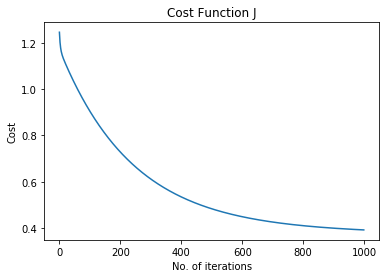

In [38]:
model_Scratch = LogisticRegressionScratch(X,Y)

print('First cost : ', model_Scratch.compute_cost())
theta_final, cost_history, n_iter = model_Scratch.gradient_descent(alph = 0.5, n_iter=1000, delta = 0.0000001)
print('Final cost',cost_history[n_iter-1], 'with',n_iter,'iterations.\n')
print('RMSE', model_Scratch.RSME())
R2_scratch = model_Scratch.R2()
print('R2_SCORE', R2_scratch)


plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_history)
plt.show()

## 2. Normal equation

In [9]:
class NormalEquation():
    
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
        self.theta = self.normalEquation()
        
    def normalEquation(self):
        X_transpose = np.transpose(self.X)
        X_transpose_dot_X = X_transpose.dot(self.X)
        X_inv = np.linalg.inv(X_transpose_dot_X)
        X_transpose_dot_Y = X_transpose.dot(self.Y)
        
        return X_inv.dot(X_transpose_dot_Y)
    
    def prediction(self):
        return self.X.dot(self.theta)
    
    def RSME(self):
        MSE = np.sum((self.prediction() - self.Y)**2)
        RSME = np.sqrt(MSE/m)
        return RSME
    
    def R2(self):
        SSR = np.sum((self.prediction() - self.Y)**2)
        SST = np.sum((self.Y - np.mean(self.Y))**2)
        R2 = 1 - (SSR/SST)
        return R2

In [21]:
feature = bike_rental_df[["season","yr","mnth","hr","holiday","workingday","weathersit","temp","hum","windspeed","days", "Mon", "Tue", "Wed", "Thr", "Fri", "Sat", "Sun"]]

m = len(feature)

X_norm = normalisation(np.array(feature).astype(np.float).reshape(m,feature.shape[1]))
X = np.insert(X_norm, 0, np.ones(m), axis=1)


Y = np.array(bike_rental_df['demand']).reshape((len(bike_rental_df),1))
Y = normalisation(Y)

print("Total samples in our dataset is: {}".format(X.shape[0]), '\n')

Total samples in our dataset is: 17379 



In [22]:
model_NormalEquation = NormalEquation(X,Y)

model_NormalEquation.normalEquation()
model_NormalEquation.prediction()
print('RMSE', model_NormalEquation.RSME())
R2_normalEquation = model_NormalEquation.R2() 
print('R2_SCORE', R2_normalEquation)

RMSE 0.7823797314807831
R2_SCORE 0.38788195576805773


## 3. Scikit Learn model

In [14]:
feature = bike_rental_df[["season","yr","mnth","hr","holiday","workingday","weathersit","temp","hum","windspeed","days", "Mon", "Tue", "Wed", "Thr", "Fri", "Sat", "Sun"]]

m = len(feature)

X_norm = normalisation(np.array(feature).astype(np.float).reshape(m,feature.shape[1]))
X = np.insert(X_norm, 0, np.ones(m), axis=1)


Y = np.array(bike_rental_df['demand']).reshape((len(bike_rental_df),1))
Y = normalisation(Y)

print("Total samples in our dataset is: {}".format(X.shape[0]), '\n')

Total samples in our dataset is: 17379 



In [15]:
model_ScikitLearn = LinearRegression().fit(X,Y)

y_prediction = model_ScikitLearn.predict(X)
print('RMSE', mean_squared_error(Y, y_prediction))
R2_scikitLearn = r2_score(Y, y_prediction)
print('R2_SCORE:', R2_scikitLearn)

RMSE 0.6121180429499347
R2_SCORE: 0.38788195705006534


## Comparaison

In [16]:
print('Difference Scratch and NormalEquation:', abs(R2_scratch - R2_normalEquation))
print('Difference Scratch and ScikitLearn:', abs(R2_scratch - R2_scikitLearn))
print('Difference ScikitLearn et NormalEquation:', abs(R2_scikitLearn - R2_normalEquation))

Difference Scratch and NormalEquation: 0.0012678870446116708
Difference Scratch and ScikitLearn: 0.1032886775715337
Difference ScikitLearn et NormalEquation: 0.10455656461614538


We can see that *R<sup>2</sup>* is the same between the Normal Equation and Scikit Learn model. 

## Feature engineering

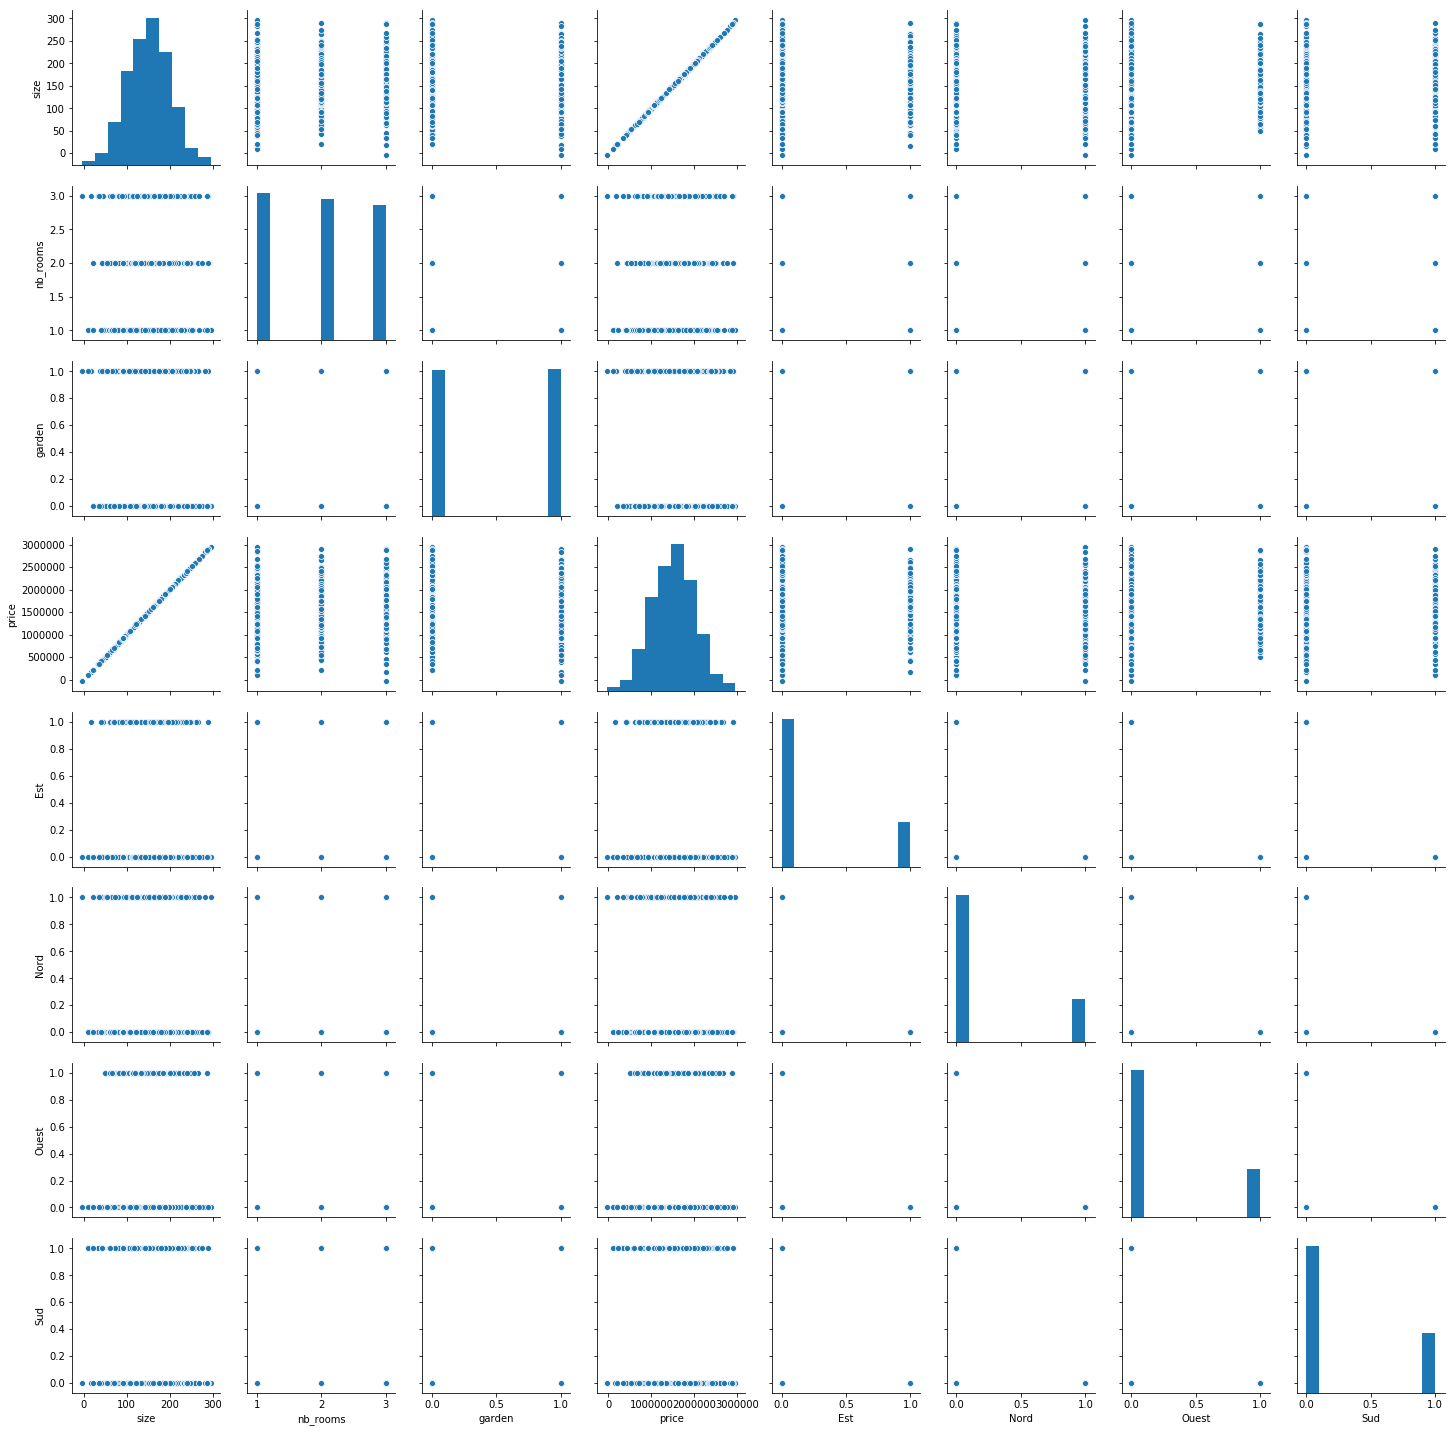

In [17]:
house_df = pd.read_csv('../../Python-for-datascience/TP1/house.csv')
house_df = pd.concat([house_df, pd.get_dummies(house_df['orientation'])], axis=1)
house_df.drop(columns='orientation', inplace=True)
sns.pairplot(house_df)

In [18]:
house_df.head(10)

size  nb_rooms  garden         price  Est  Nord  Ouest  Sud
0   95.056637         3       1  9.514363e+05    1     0      0    0
1  139.862079         3       1  1.401691e+06    0     0      0    1
2  224.064203         3       0  2.239801e+06    0     0      1    0
3  193.014152         1       1  1.931833e+06    0     0      1    0
4  215.683859         1       1  2.158777e+06    0     1      0    0
5  203.231329         3       0  2.032797e+06    0     1      0    0
6  198.035370         2       1  1.980077e+06    0     1      0    0
7   77.249254         2       0  7.732205e+05    1     0      0    0
8  145.876344         2       1  1.459998e+06    0     0      1    0
9   50.094402         1       0  5.019483e+05    0     0      1    0

In [19]:
feature = house_df[['size', 'nb_rooms', 'garden']]

m = len(feature)

X_norm = normalisation(np.array(feature).astype(np.float).reshape(m,feature.shape[1]))
X = np.insert(X_norm, 0, np.ones(m), axis=1)


Y = np.array(house_df['price']).reshape((len(house_df),1))
Y = normalisation(Y)

print("Total samples in our dataset is: {}".format(X.shape[0]), '\n')

Total samples in our dataset is: 950 



Final cost 5.0011250601130775e-05 with 66 iterations.

RMSE 0.010001124996832185
R2_SCORE 0.9998999774987978


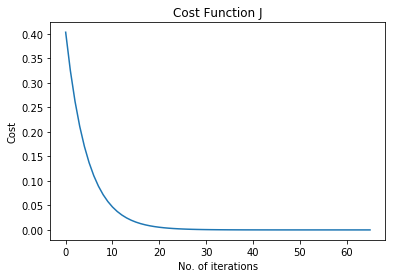

In [20]:
model_Scratch = LogisticRegressionScratch(X,Y)

theta_final, cost_history, n_iter = model_Scratch.gradient_descent(alph = 0.5, n_iter=1000, delta = 0.0000001)
print('Final cost',cost_history[n_iter-1], 'with',n_iter,'iterations.\n')
print('RMSE', model_Scratch.RSME())
R2_scratch = model_Scratch.R2()
print('R2_SCORE', R2_scratch)


plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_history)
plt.show()